In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras import optimizers

# load the dataset
df = pd.read_csv("./data/fine_foods/sampled_fine_food_reviews.csv")

# split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# tokenize the reviews
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(train_df["Text"])

# convert text to sequences
X_train = tokenizer.texts_to_sequences(train_df["Text"])
X_test = tokenizer.texts_to_sequences(test_df["Text"])

# add padding to ensure uniform length
maxlen = 100
X_train = pad_sequences(X_train, padding="post", maxlen=maxlen)
X_test = pad_sequences(X_test, padding="post", maxlen=maxlen)

# convert sentiment categories to numeric labels
y_train = pd.get_dummies(train_df["Score"]).values
y_test = pd.get_dummies(test_df["Score"]).values



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          200000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 317,893
Trainable params: 317,893
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30


2023-04-11 16:43:40.918551: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2500/2500 [==============================] - 282s 113ms/step - loss: 1.0937 - accuracy: 0.6382 - val_loss: 1.1037 - val_accuracy: 0.6352
Epoch 2/30
2500/2500 [==============================] - 286s 114ms/step - loss: 0.9847 - accuracy: 0.6562 - val_loss: 0.8717 - val_accuracy: 0.6834
Epoch 3/30
2500/2500 [==============================] - 295s 118ms/step - loss: 0.8241 - accuracy: 0.6971 - val_loss: 0.7854 - val_accuracy: 0.7064
Epoch 4/30
2500/2500 [==============================] - 284s 114ms/step - loss: 0.7574 - accuracy: 0.7172 - val_loss: 0.7450 - val_accuracy: 0.7214
Epoch 5/30
2500/2500 [==============================] - 278s 111ms/step - loss: 0.7293 - accuracy: 0.7260 - val_loss: 0.7295 - val_accuracy: 0.7265
Epoch 6/30
2500/2500 [==============================] - 287s 115ms/step - loss: 0.7100 - accuracy: 0.7339 - val_loss: 0.7254 - val_accuracy: 0.7285
Epoch 7/30
2500/2500 [==============================] - 285s 114ms/step - loss: 0.6944 - accuracy: 0.7397 - val_loss: 0.712

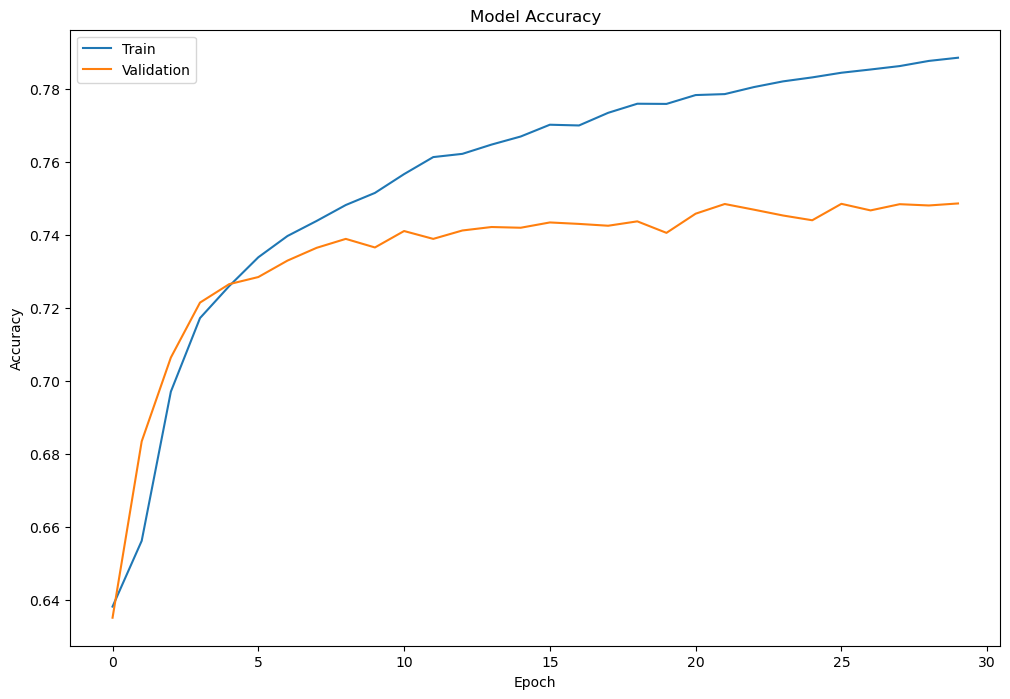

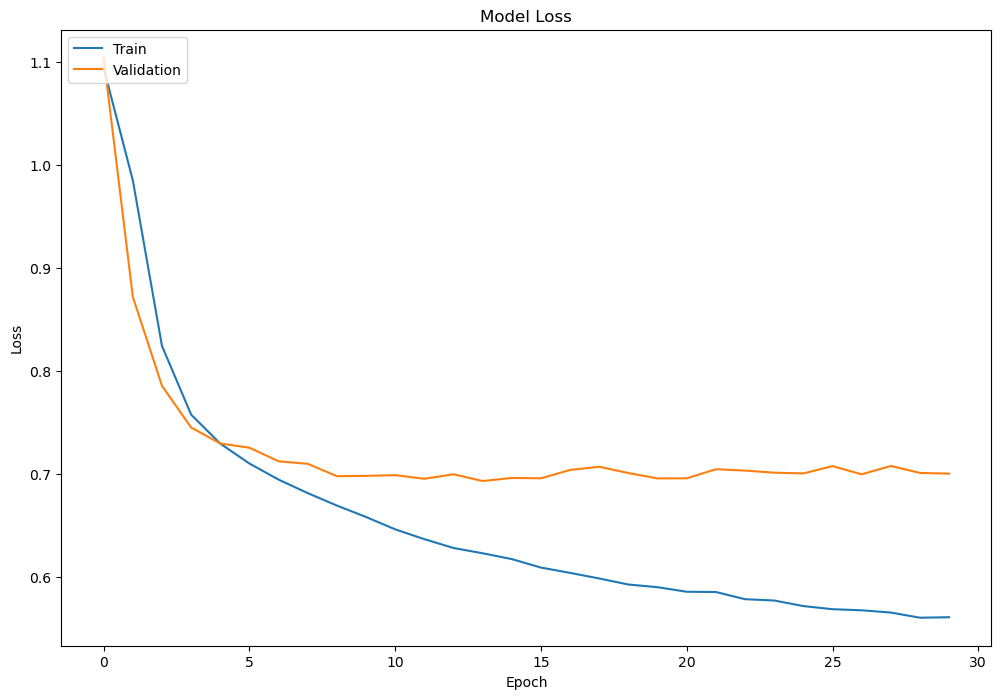

In [3]:
# define the model architecture
embedding_vector_length = 100
model = Sequential()
model.add(Embedding(2000, embedding_vector_length, input_length=maxlen))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(5, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])
print(model.summary())

# train the model
epochs = 30
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=epochs, batch_size=32, verbose=1)

# evaluate the model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

# plot the accuracy and loss for training and validation sets
plt.figure(figsize=(12, 8))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()
